In [13]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [14]:
mpg = sns.load_dataset("mpg")
print(mpg.head())

    mpg  cylinders  displacement  horsepower  weight  acceleration  \
0  18.0          8         307.0       130.0    3504          12.0   
1  15.0          8         350.0       165.0    3693          11.5   
2  18.0          8         318.0       150.0    3436          11.0   
3  16.0          8         304.0       150.0    3433          12.0   
4  17.0          8         302.0       140.0    3449          10.5   

   model_year origin                       name  
0          70    usa  chevrolet chevelle malibu  
1          70    usa          buick skylark 320  
2          70    usa         plymouth satellite  
3          70    usa              amc rebel sst  
4          70    usa                ford torino  


In [15]:
mpg = mpg.dropna()
print(mpg.info())

<class 'pandas.core.frame.DataFrame'>
Index: 392 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model_year    392 non-null    int64  
 7   origin        392 non-null    object 
 8   name          392 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 30.6+ KB
None


In [16]:
X= mpg[['horsepower']].values
Y= mpg['mpg'].values

In [17]:
X_mean, X_std = X.mean(), X.std()
#X_min, X_max = X.max(),X.min()
X = (X - X_mean) / X_std
#X=(X-X_min)/(X_max-X_min)

In [18]:
def model(X,a,b):
    return a*X + b

In [19]:
a=np.random.rand()
b=np.random.rand()

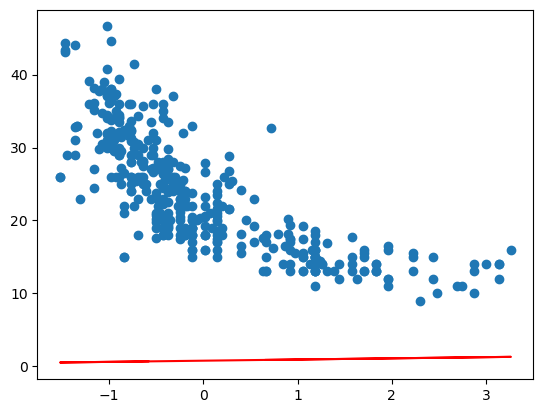

In [20]:
predictions = model(X,a,b)
plt.scatter(X,Y)
plt.plot(X, predictions, c='r')

In [21]:
def cost_function(X,Y,a,b):
    s = 0
    m = len(X)
    for i in range(m):
        s += (model(X[i],a,b) - Y[i])**2
    return s / m

In [22]:
def gradient_descent(X, Y, alpha, n):
    a = np.random.rand()
    b = np.random.rand()
    m = len(X)
    cost_history = [] 
    for j in range(n):
       sa = 0
       sb = 0
       for i in range(m):
           sa += X[i] * (a*X[i] + b - Y[i])
           sb += a*X[i] + b - Y[i]
       a -= ((2*alpha)/m)*sa
       b -= ((2*alpha)/m)*sb
       cost = cost_function(X, Y, a, b)                  
       cost_history.append(cost) 
    return a,b ,cost_history

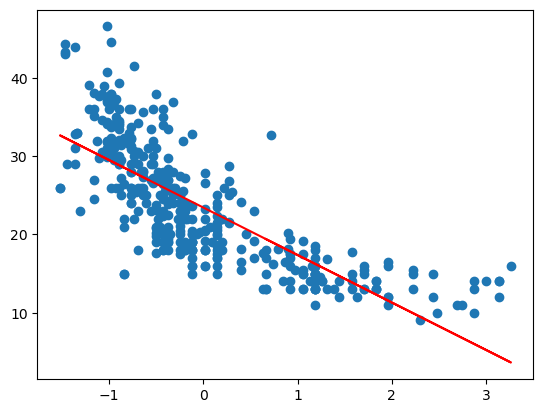

In [23]:
a,b,cost_history =gradient_descent(X,Y,0.01,1000)
ypred = model(X,a,b)
plt.scatter(X,Y)
plt.plot(X,ypred,'-r')

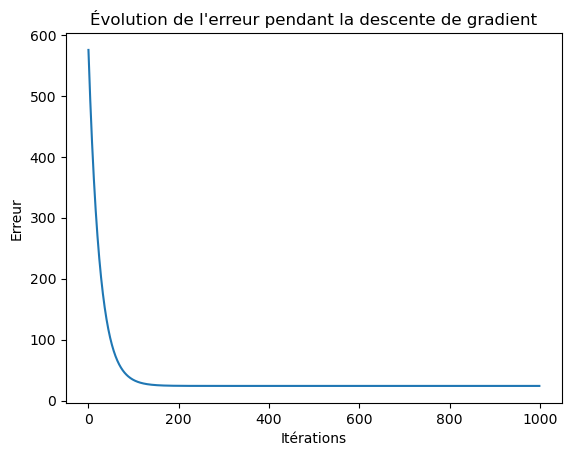

In [24]:
plt.plot(range(len(cost_history)),cost_history)
plt.xlabel("Itérations")
plt.ylabel("Erreur")
plt.title("Évolution de l'erreur pendant la descente de gradient")
plt.show() 